In [ ]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO
import shutil

## Model Setup

In [2]:
print(os.getcwd())
model = YOLO('./../../runs/detect_yolo8n_wild_boar+deer/yolov8n_deer_and_wild_boar2024-11-20 14_38_43.108048.pt')

c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation


In [3]:
def extract_values(results, class_counts, folder, threshhold, unknown_folder_path):
    x = 0
    
    for result in results:
        x+=1
        # print(f"\n\n\033[4mBild Nummer{x}\033[0m\n")
        if result.boxes.cls.numel() != 0:
            for box in result.boxes:
                class_counts[folder][str(int(box.cls))].append(float(box.conf))
                if float(box.conf) < threshhold:
                    class_counts[folder]["unknown"].append(float(box.conf))
                    if folder == "TODO":
                        shutil.copy(f"../../data/img/{folder}/{file}", os.path.join(unknown_folder_path, file))
        else:
            class_counts[folder]["no_deer_or_wild_boar"].append(5)
    return class_counts
# extract_values(results, class_counts, folder)

## Evaluation of Pictures

In [ ]:
unknown_folder_path = "TODO"
if not os.path.exists(unknown_folder_path):
    os.makedirs(unknown_folder_path)
    
folders = folders = os.listdir("./../../.data/evaluation/img/vergleich")
    
# 0 = deer; 1 = wild_boar
classes = ["0", "1", "no_deer_or_wild_boar", "unknown"]
class_counts = {'deer': {cls: [] for cls in classes},
                'no_animal': {cls: [] for cls in classes},
                'no_deer': {cls: [] for cls in classes}}
                # 'wild_boar': {cls: [] for cls in classes}}

# Grenzwert zum Festlegen einer Objekterkennungssicherheit
# Merke: → model.predict nutzt bereits einen threshhold conf = 0.25 und einen für NMS iou = 0.7.
threshhold = 0.3 
                
for folder in folders:
    print(f"{folder}")
    results = model.predict(source=f"./../../.data/evaluation/img/vergleich/{folder}")
    class_counts = extract_values(results, class_counts, folder, threshhold, unknown_folder_path)

class_counts
    

deer

image 1/42 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation\..\..\.data\evaluation\img\vergleich\deer\01010067.JPG: 480x640 2 wild_boars, 128.1ms
image 2/42 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation\..\..\.data\evaluation\img\vergleich\deer\01010069.JPG: 480x640 1 deer, 1 wild_boar, 64.3ms
image 3/42 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation\..\..\.data\evaluation\img\vergleich\deer\01020035.JPG: 480x640 3 wild_boars, 70.6ms
image 4/42 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src\evaluation\..\..\.data\evaluation\img\vergleich\deer\01020036.JPG: 480x640 3 deers, 1 wild_boar, 71.0ms
image 5/42 c:\Users\Z0127829\OneDrive - ZF Friedrichshafen AG\Desktop\Arbeit\Studienarbeit\intelligente_wildkamera\src

### Distribution of predictions for each folder

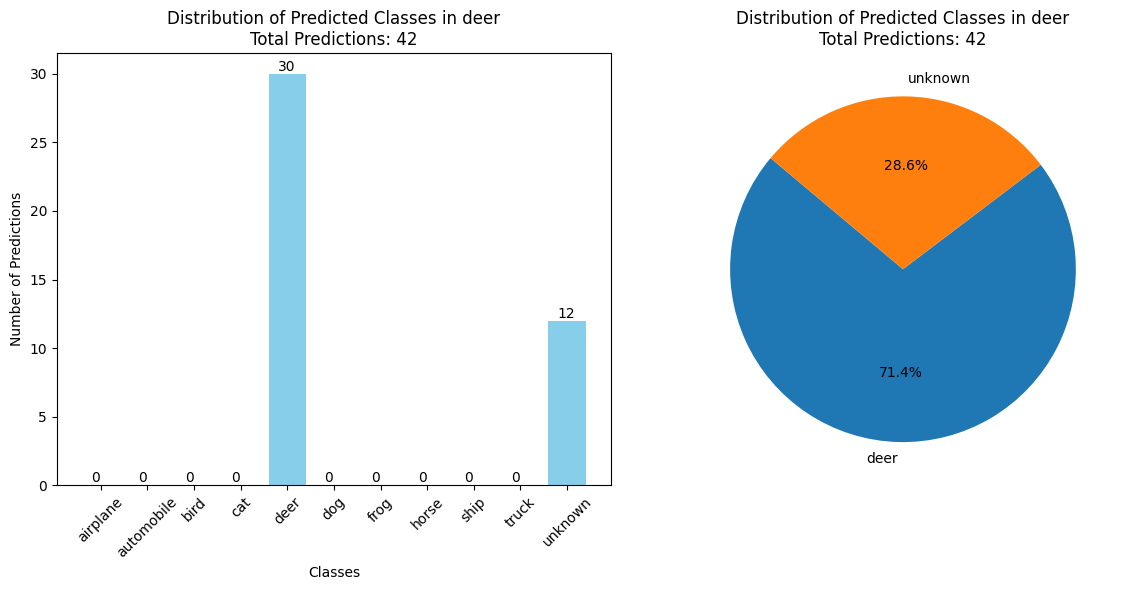

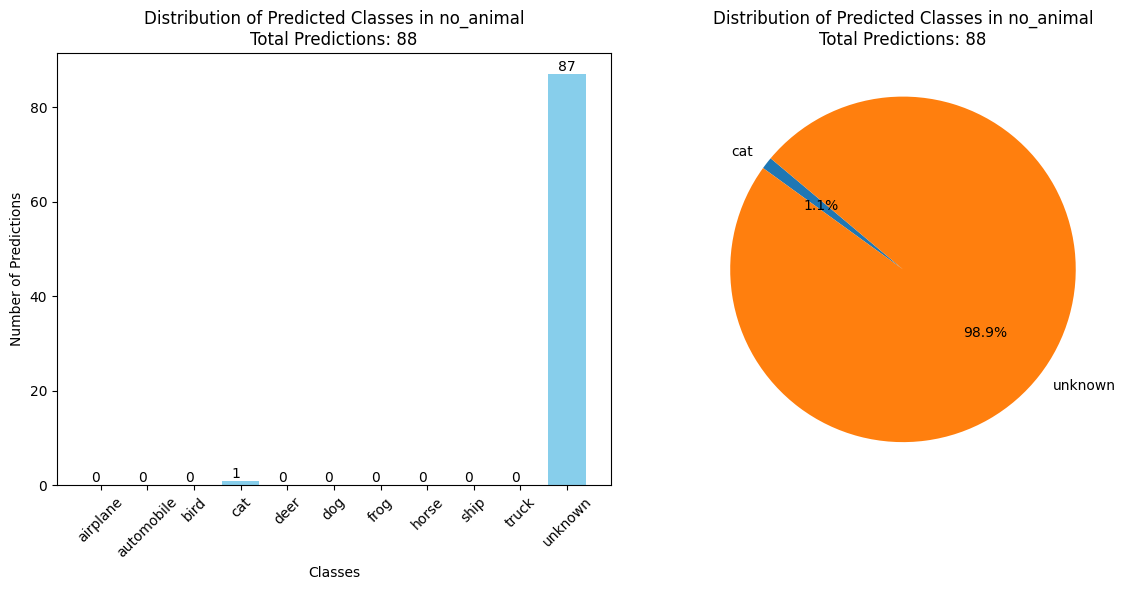

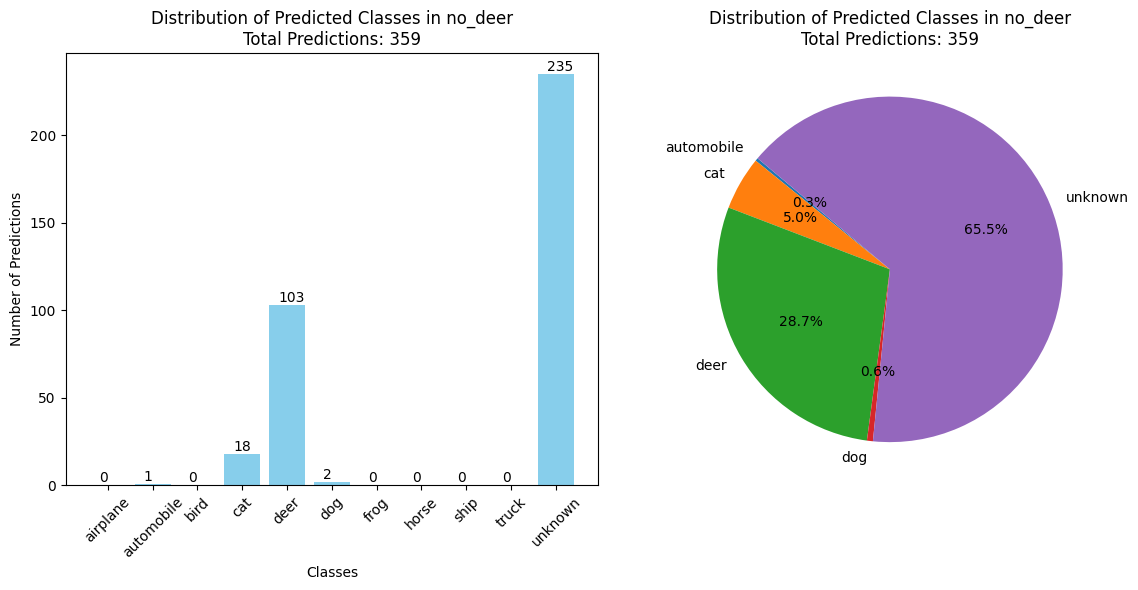

In [33]:
for folder in folders:
    # Total number of predictions for the current folder
    total_predictions = sum(len(class_counts[folder][cls]) for cls in classes)

    # Bar chart
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    bars = plt.bar(classes, [len(class_counts[folder][cls]) for cls in classes], color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of Predictions')
    plt.title(f'Distribution of Predicted Classes in {folder}\nTotal Predictions: {total_predictions}')
    plt.xticks(rotation=45)

    # Adding exact numbers above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 - 0.2, yval, round(yval, 2), va='bottom')

    # Removing classes with 0 predictions for the pie chart
    nonzero_class_counts = {cls: len(class_counts[folder][cls]) for cls in classes if len(class_counts[folder][cls]) > 0}

    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(nonzero_class_counts.values(), labels=nonzero_class_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Predicted Classes in {folder}\nTotal Predictions: {total_predictions}')

    plt.tight_layout()
    plt.show()

## Evaluation of the unknown deer pictures

In [ ]:
still_unknown_folder_path = "TODO"
if not os.path.exists(still_unknown_folder_path):
    os.makedirs(still_unknown_folder_path)
    
folders = folders = os.listdir("./../../.data/evaluation/img/vergleich")
    
# 0 = deer; 1 = wild_boar
classes = ["0", "1", "no_deer_or_wild_boar", "unknown"]
class_counts = {'deer': {cls: [] for cls in classes},
                'no_animal': {cls: [] for cls in classes},
                'no_deer': {cls: [] for cls in classes}}
                # 'wild_boar': {cls: [] for cls in classes}}

# Grenzwert zum Festlegen einer Objekterkennungssicherheit
# Merke: → model.predict nutzt bereits einen threshhold conf = 0.25 und einen für NMS iou = 0.7.
threshhold = 0
                
for folder in folders:
    print(f"{folder}")
    results = model.predict(source=f"./../../.data/evaluation/img/vergleich/{folder}")
    class_counts = extract_values(results, class_counts, folder, threshhold, still_unknown_folder_path)

class_counts
    

../../data/img/deer/unknown/01020035.JPG
../../data/img/deer/unknown/01040156 1.JPG
../../data/img/deer/unknown/01040156.JPG
../../data/img/deer/unknown/06280189.JPG
../../data/img/deer/unknown/deer_6.jpg
../../data/img/deer/unknown/IMAG0004.JPG
../../data/img/deer/unknown/IMAG0054.JPG
→ still unknown, prediction: horse with value: 1.8554
../../data/img/deer/unknown/IMAG0056.JPG
→ still unknown, prediction: frog with value: 1.5156
../../data/img/deer/unknown/IMAG0059.JPG
../../data/img/deer/unknown/IMAG0061.JPG
→ still unknown, prediction: dog with value: 3.5532
../../data/img/deer/unknown/IMAG0068.JPG
→ still unknown, prediction: dog with value: 3.0704
../../data/img/deer/unknown/IMAG0073.JPG


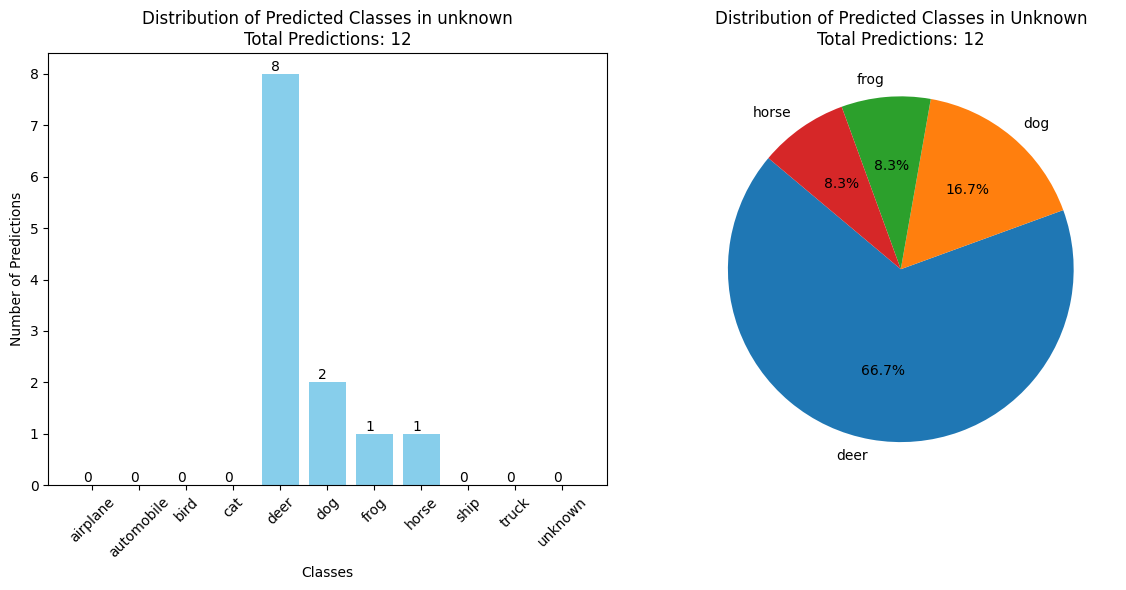

In [35]:
# Total number of predictions for the current folder
total_predictions = sum(len(class_counts["unknown"][cls]) for cls in classes)

# Bar chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(classes, [len(class_counts["unknown"][cls]) for cls in classes], color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Predictions')
plt.title(f'Distribution of Predicted Classes in unknown\nTotal Predictions: {total_predictions}')
plt.xticks(rotation=45)

# Adding exact numbers above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.2, yval, round(yval, 2), va='bottom')

# Removing classes with 0 predictions for the pie chart
nonzero_class_counts = {cls: len(class_counts["unknown"][cls]) for cls in classes if len(class_counts["unknown"][cls]) > 0}

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(nonzero_class_counts.values(), labels=nonzero_class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Predicted Classes in Unknown\nTotal Predictions: {total_predictions}')

plt.tight_layout()
plt.show()

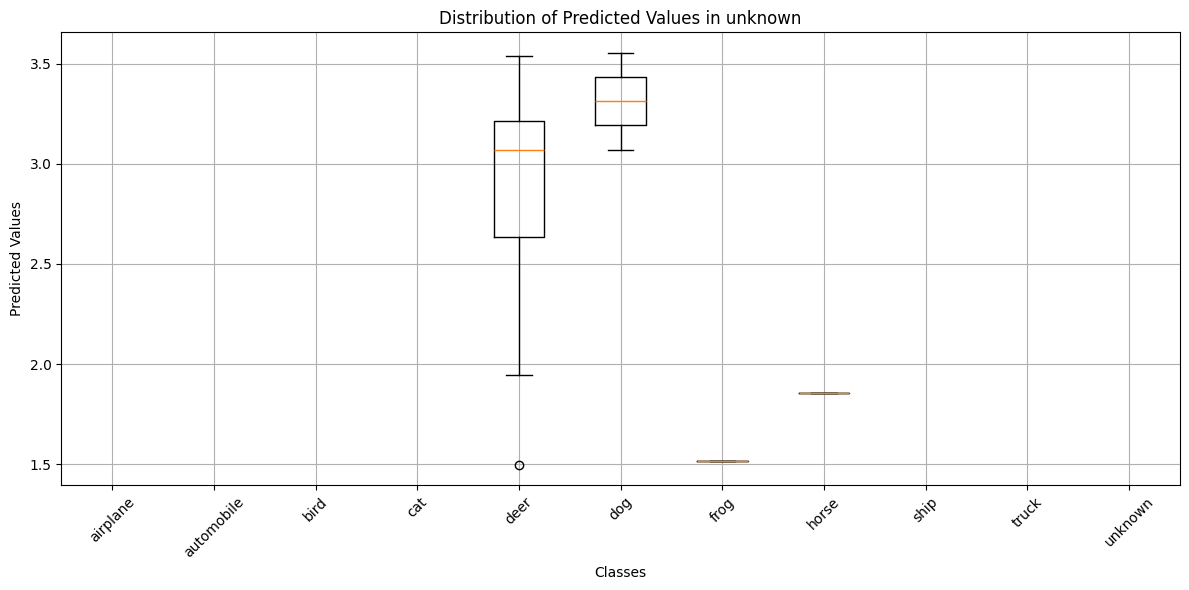

In [ ]:
plt.figure(figsize=(12, 6))
plt.title(f'Distribution of Predicted Values in unknown')

predicted_values = [class_counts["unknown"][cls] for cls in classes if cls != "no_deer_or_wild_boar"]
classes_new = ["0","1", "unknown"]
plt.boxplot(predicted_values, labels=classes)
plt.xlabel('Classes')
plt.ylabel('Predicted Values')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()